### Задача

Вам предстоит решить типичную для продуктовой аналитики задачу прогноза LTV пользователя. Для этого необходимо:
1) провести исследовательский анализ данных,
2) визуализировать результаты и сделать из них выводы,
3) провести предобработку признаков (возможно создать новые),
4) обучить модели, и подобрать для каждой из них оптимальные гиперпараметры,
5) оценить работу моделей и сравнить их между собой, выбрать итоговую и объяснить свой выбор,
6) проинтерпретировать получившиеся результаты (что и как влияет на LTV пользователя).

### Данные
В файле LTV.csv представлены данные о пользователях с автомобильной страховкой, собранных системой аналитики компании IBM. https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/


Описание данных:

* Customer - идентификатор пользователя
* State - штат
* Customer Lifetime Value - LTV пользователя
* Response - взаимодействие с рекламой
* Coverage - тип страхового покрытия
* Education - образование
* Effective to date - срок действия страховки
* EmploymentStatus - трудоустройство
* Gender - пол
* Income - доход
* Location code - тип местности в которой проживает пользователь
* Marital Status - семейное положение
* Monthly Premium Auto
* Months Since Last Claim - месяцев с последнего требования по выплате компенсации
* Months Since Policy Inception - месяцев с открытия страховки
* Number of Open Complaints - количество незакрытых жалоб
* Number of Policies - количество полисов
* Policy Type - тип страховки
* Policy - страховка
* Renew Offer Type - обновленный тип предложения
* Sales Channel - канал продаж
* Total Claim Amount - сумма выплаченных компенсаций
* Vehicle Class - класс автомобиля
* Vehicle Size - размер автомобиля

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

Загрузим датасет и посмотри несколько случайных значений из него

In [8]:
train_data = pd.read_csv('../../../MyPython\DS\les_5/LTV.csv')

print(f'Размер датасета: {train_data.shape}')

train_data.sample(10)

Размер датасета: (9134, 24)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
7432,FG43850,Oregon,7472.672033,No,Extended,High School or Below,1/14/11,Employed,M,44385,...,31,0,7,Corporate Auto,Corporate L3,Offer4,Call Center,465.600000,Four-Door Car,Small
6689,VY58444,Nevada,4426.096934,No,Basic,College,1/19/11,Employed,F,29660,...,71,0,1,Personal Auto,Personal L3,Offer1,Agent,334.133949,SUV,Small
1320,ZH42145,Washington,2582.862313,No,Basic,High School or Below,2/22/11,Employed,F,50148,...,45,0,1,Corporate Auto,Corporate L3,Offer2,Web,323.485239,Four-Door Car,Small
1337,ZB62469,California,2161.685527,No,Basic,High School or Below,2/21/11,Unemployed,M,0,...,75,2,1,Corporate Auto,Corporate L3,Offer2,Call Center,482.400000,Two-Door Car,Medsize
7999,JO68735,California,2292.791874,No,Basic,Bachelor,2/6/11,Unemployed,F,0,...,30,0,1,Personal Auto,Personal L3,Offer1,Branch,460.800000,Two-Door Car,Medsize
5835,EV68966,California,9419.883665,No,Basic,College,2/23/11,Employed,M,87840,...,42,1,3,Personal Auto,Personal L3,Offer1,Call Center,161.590594,SUV,Medsize
8792,WK55963,California,8130.651447,No,Basic,College,1/2/11,Employed,M,61036,...,75,0,2,Corporate Auto,Corporate L3,Offer3,Web,413.252330,Two-Door Car,Medsize
1379,CU13711,Oregon,10864.274910,No,Basic,Doctor,2/9/11,Employed,F,95579,...,78,0,2,Personal Auto,Personal L1,Offer1,Agent,308.631159,Four-Door Car,Medsize
2822,PZ31902,Arizona,5797.604861,No,Basic,Bachelor,2/22/11,Employed,F,69276,...,22,2,8,Personal Auto,Personal L3,Offer4,Web,201.327931,Two-Door Car,Medsize
2168,IS63925,Arizona,7805.312870,Yes,Basic,College,1/27/11,Retired,F,21073,...,54,1,3,Personal Auto,Personal L2,Offer1,Agent,508.800000,SUV,Small


Посмотрим информацию о датасете

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Проверим датасет на дубликаты

In [10]:
duplicates = train_data.duplicated()
train_data[duplicates]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size


Вывод: В датасете представлены 24 столбца с разными типами значений (строковые  и числовые), пустые значение в столбцах отсутствуют, дубликаты отсутствуют

### Визуализация данных

Выделим матрицу признаков и вектор с целевой переменной в тренировочной выборке

In [11]:
# Тренировочная выборка
X = train_data.drop('Customer Lifetime Value', axis = 1)

# Целевая переменная
y = pd.DataFrame(train_data['Customer Lifetime Value'])

Выделяем численные признаки от остальных

In [12]:
num_cols = []
str_cols = []

cols_and_type = X.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)
    else: 
        str_cols.append(col)
        
print(num_cols)

['Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


In [13]:
cols_and_type

{'Customer': dtype('O'),
 'State': dtype('O'),
 'Response': dtype('O'),
 'Coverage': dtype('O'),
 'Education': dtype('O'),
 'Effective To Date': dtype('O'),
 'EmploymentStatus': dtype('O'),
 'Gender': dtype('O'),
 'Income': dtype('int64'),
 'Location Code': dtype('O'),
 'Marital Status': dtype('O'),
 'Monthly Premium Auto': dtype('int64'),
 'Months Since Last Claim': dtype('int64'),
 'Months Since Policy Inception': dtype('int64'),
 'Number of Open Complaints': dtype('int64'),
 'Number of Policies': dtype('int64'),
 'Policy Type': dtype('O'),
 'Policy': dtype('O'),
 'Renew Offer Type': dtype('O'),
 'Sales Channel': dtype('O'),
 'Total Claim Amount': dtype('float64'),
 'Vehicle Class': dtype('O'),
 'Vehicle Size': dtype('O')}

На основе текста задания построим словарь названий признаков, чтобы легче было понять график признаков

In [23]:
dict_col = {
'Customer': 'идентификатор пользователя',
'State': 'штат',
'Customer Lifetime Value': 'LTV пользователя',
'Response': 'взаимодействие с рекламой',
'Coverage': 'тип страхового покрытия',
'Education': 'образование',
'Effective To Date': 'срок действия страховки',
'EmploymentStatus': 'трудоустройство',
'Gender': 'пол',
'Income': 'доход',
'Location Code': 'тип местности в которой проживает пользователь',
'Marital Status': 'семейное положение',
'Monthly Premium Auto': 'Ежемесячный Премиум Авто',
'Months Since Last Claim': 'месяцев с последнего \n требования по выплате компенсации',
'Months Since Policy Inception': 'месяцев с открытия страховки',
'Number of Open Complaints': 'количество незакрытых жалоб',
'Number of Policies': 'количество полисов',
'Policy Type': 'тип страховки',
'Policy': 'страховка',
'Renew Offer Type': 'обновленный тип предложения',
'Sales Channel': 'канал продаж',
'Total Claim Amount': 'сумма выплаченных компенсаций',
'Vehicle Class': 'класс автомобиля',
'Vehicle Size': 'размер автомобиля'
}

Построим графики и посмотрим на распределение признаков

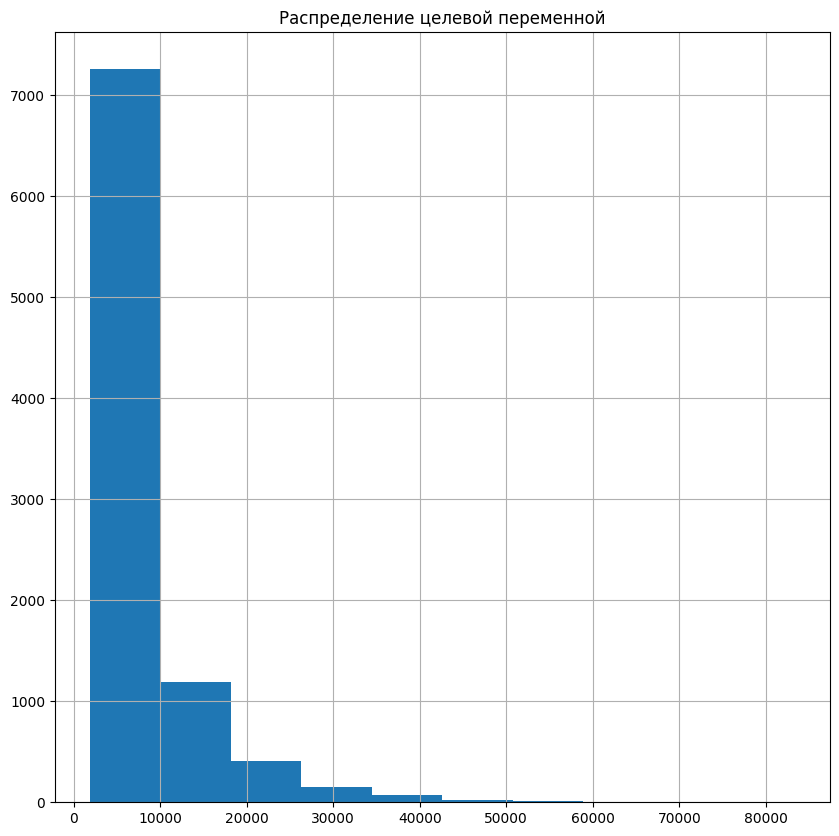

In [24]:
plt.figure(figsize = (10, 10))
plt.title('Распределение целевой переменной')
train_data['Customer Lifetime Value'].hist()

plt.show()

Распределение числовых признаков

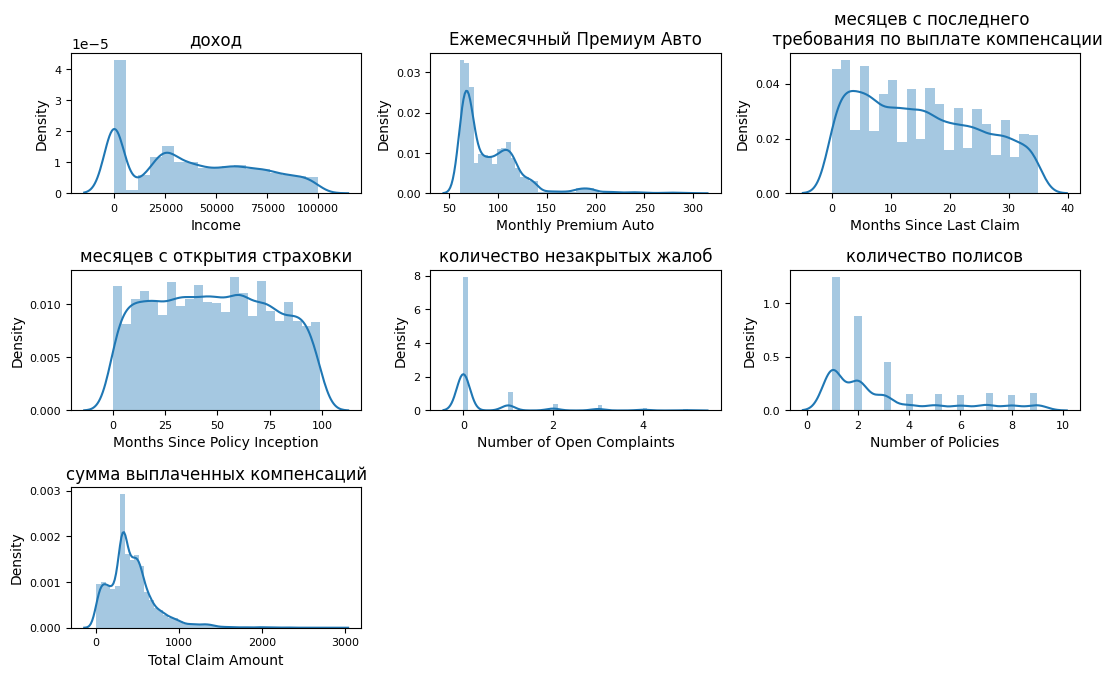

In [25]:
plt.figure(figsize = (11, 13))

for i, col in enumerate(num_cols):
    plt.subplot(6, 3, i+1)
    plt.title(f'{dict_col[col]}')
    plt.xticks(fontsize=8, rotation=0)
    plt.yticks(fontsize=8, rotation=0)
    sns.distplot(train_data[col])
    
plt.tight_layout()

Вывод: Числовые признаки распределены нормально

Распределение строковых признаков

In [ ]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака "{dict_col[col]}" в тренировочных данных')
    plt.xticks(rotation=90)
    train_data[col].hist()

### Предобработка признаков

С помощью LabelEncoder приведем строковые признаки к числовым

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in str_cols:
    X[col] = le.fit_transform(X[col])

X.sample(10)

In [ ]:
X.info()

Прорведем стандартизацию данных

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

Построим матрицу корреляции

In [ ]:
# Преобразуем матрицу признаков в DataFrame
train_data_trasformed = pd.DataFrame(X_sc, columns = X.columns)
train_data_trasformed['Customer Lifetime Value'] = y
# Создаем корреляционную матрицу
corr_m = train_data_trasformed.corr()
corr_m = np.round(corr_m, 2)
corr_m

Визуализируем матрицу при помощи sns.heatmap

In [ ]:
plt.figure(figsize = (18, 18))
plt.title('Корреляционная матрица')
sns.heatmap(corr_m, annot = True)
plt.show()

Вывод: Наиболее зависимы друг от друга признаки "Страховка" и "Тип страховки" (коэффициент корреляции 0,88) и "Ежемесячный Премиум авто" и "Сумма выплаченных компенсаций" (кк = 0,63)

In [ ]:
X = X.drop('Customer', axis = 1)

### Обучение моделей

Сравним 3 модели (как в лекции): Логистическую регрессию, классификатор на решающем дереве, и случайный лес

In [ ]:
# Логистическая регрессия
from sklearn.linear_model import LogisticRegression

# Кросс-валидация
from sklearn.model_selection import cross_validate

log_reg = LogisticRegression(C = 0.8, random_state = 42, max_iter = 500)

cv_log_reg = cross_validate(log_reg, X_sc, y, cv = 5, scoring = 'roc_auc')
print(cv_log_reg['test_score'])
print("Результаты Логистической регрессии:", sum(cv_log_reg['test_score']) / len(cv_log_reg['test_score']))


In [ ]:
# Решающее дерево
from sklearn.tree import DecisionTreeClassifier


dec_tree = DecisionTreeClassifier(random_state = 42) # Можно найти более оптимальные гиперпараметры

cv_dec_tree = cross_validate(dec_tree, X_sc, y, cv = 5, scoring = 'roc_auc')

print("Результаты решающего дерева:", sum(cv_dec_tree['test_score']) / len(cv_dec_tree['test_score']))


In [ ]:
# Случайный лес
from sklearn.ensemble import RandomForestClassifier


ran_for = RandomForestClassifier(random_state = 42) # Можно найти более оптимальные гиперпараметры

cv_ran_for = cross_validate(ran_for, X, y, cv = 5, scoring = 'roc_auc')

print("Результаты решающего дерева:", sum(cv_ran_for['test_score']) / len(cv_ran_for['test_score']))


Вывод: 

### Интерпретация модели и важность признаков

In [ ]:
# log_reg.fit(X, y)
# print("Коэффициенты в линейной регрессии:", log_reg.coef_)

In [ ]:
# dec_tree.fit(X, y)
# print("Важность признаков решающего дерева", dec_tree.feature_importances_)

In [ ]:
# import shap
# # Загружаем JS шаблоны для визуализации
# shap.initjs()

# # Обязателен явный вызов метода fit
# ran_for.fit(X, y)

# print("Обучили модель, переходим к визуализации")
# # Интерпретируем предсказания модели при помощи SHAP
# explainer = shap.TreeExplainer(ran_for)
# shap_values = explainer.shap_values(X)

In [ ]:
# # Общий график
# shap.summary_plot(shap_values, X, plot_type="bar")